## Step 1 has already been completed, scroll down to test 2!

In [2]:
#Step 1
"""
Parker Solar Probe Carrington Longitude Data Converter
======================================================

This script converts Parker Solar Probe Carrington Longitude data from CSV format
to NPZ (NumPy Zipped) format for improved performance and efficiency.

Purpose:
- Convert the CSV file containing Time and Parker-CARR-LON(deg) columns to a compressed binary format
- Properly parse timestamps and convert to NumPy datetime64 format
- Save column metadata for future reference
- Verify the conversion was successful
- Enable faster data loading for the Plotbot multiplot system

The NPZ format provides significant performance benefits:
- Binary storage instead of text parsing (10-100x faster loading)
- Pre-converted data types (no parsing overhead)
- Compressed storage (smaller file size)
- Direct compatibility with NumPy/SciPy ecosystem

This converted data will be used for tracking Parker Solar Probe's position in the
Carrington rotation frame of the Sun, which is essential for correlating in-situ
measurements with solar features observed by remote sensing instruments.

Original data source: Parker-SolO-Earth-15min-Trajectories-20180815-20300101.csv
Created: April 2025
"""

# ✨THIS PROCESS HAS ALREADY BEEN COMPLETED. THE DATA IS HERE:✨
# support_data/trajectories/Parker-CARR-LON.npz

import numpy as np
import pandas as pd
import os
import sys

# Add utils directory to path if needed
# sys.path.append('/path/to/utils')  # Uncomment if needed

# Load from script (Option 1)
# from convert_to_npz import convert_csv_to_npz  # If you refactored the script as a function

# Or run the code directly (Option 2)
# Specific path to the CSV file
csv_path = "/Users/robertalexander/Downloads/Parker-CARR-LON.csv" #<--location of the local input CSV file
npz_path = "../support_data/trajectories/Parker-CARR-LON.npz" #<--Output location of the NPZ file

# Read the CSV file
print("Reading CSV file...")
df = pd.read_csv(csv_path)

# Get column names
time_column = df.columns[0]
value_column = df.columns[1]

print(f"Converting {time_column} to datetime objects...")
# Convert time strings to datetime objects and then to numpy datetime64
times = pd.to_datetime(df[time_column]).to_numpy()
values = df[value_column].to_numpy()  # The Parker-CARR-LON values

print(f"Saving to NPZ file: {npz_path}")
# Save as NPZ with metadata
np.savez(npz_path, 
         times=times, 
         values=values, 
         time_column_name=time_column, 
         value_column_name=value_column)

print("Conversion complete!")
print(f"Data shape: {times.shape[0]} rows")
print(f"Time range: {times[0]} to {times[-1]}")

# Now let's verify the NPZ file was created correctly
if os.path.exists(npz_path):
    # Load the NPZ file
    data = np.load(npz_path)
    
    # Print the keys
    print(f"NPZ file keys: {data.files}")
    
    # Print sample data
    print(f"Sample times: {data['times'][:5]}")
    print(f"Sample values: {data['values'][:5]}")
    
    # Print metadata
    print(f"Time column name: {str(data['time_column_name'])}")
    print(f"Value column name: {str(data['value_column_name'])}")
else:
    print(f"ERROR: NPZ file not found at {npz_path}")

Reading CSV file...
Converting Time to datetime objects...
Saving to NPZ file: /Users/robertalexander/Downloads/Parker-CARR-LON.npz
Conversion complete!
Data shape: 99768 rows
Time range: 2018-08-15T00:00:00.000000000 to 2029-12-31T23:00:00.000000000
NPZ file keys: ['times', 'values', 'time_column_name', 'value_column_name']
Sample times: ['2018-08-15T00:00:00.000000000' '2018-08-15T01:00:00.000000000'
 '2018-08-15T02:00:00.000000000' '2018-08-15T03:00:00.000000000'
 '2018-08-15T04:00:00.000000000']
Sample values: [240.86882732 240.30146126 239.73409664 239.1667335  238.59937182]
Time column name: Time
Value column name: Parker-CARR-LON(deg)


Available keys in the NPZ file: ['times', 'values', 'time_column_name', 'value_column_name']
Original column names: Time, Parker-CARR-LON(deg)
Data shape: (99768,)
Time range: 2018-08-15T00:00:00.000000000 to 2029-12-31T23:00:00.000000000
Value range: 0.0021806026529679 to 359.9942152086629

First 5 rows of data:
2018-08-15T00:00:00.000000000 : 240.86882732217427
2018-08-15T01:00:00.000000000 : 240.3014612562508
2018-08-15T02:00:00.000000000 : 239.7340966444374
2018-08-15T03:00:00.000000000 : 239.16673349519328
2018-08-15T04:00:00.000000000 : 238.5993718173349


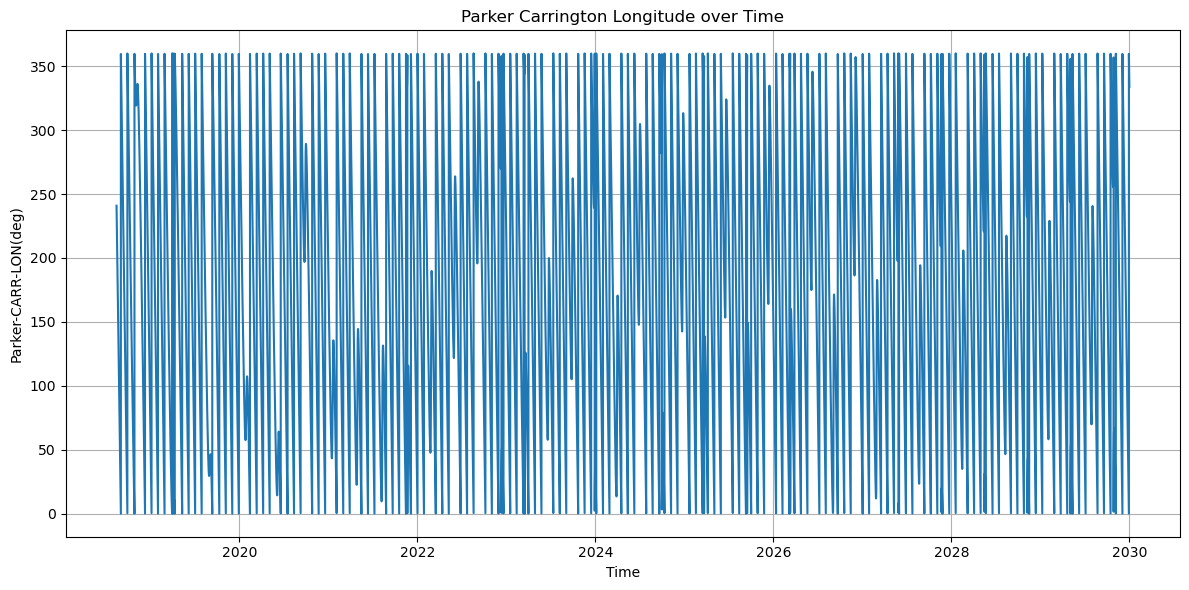

In [ ]:
#Step 2

"""
Parker Solar Probe Carrington Longitude Data Visualization
=========================================================

This script loads Parker Solar Probe Carrington Longitude data from an NPZ file
and demonstrates basic visualization and data inspection capabilities.

Purpose:
- Load compressed binary data efficiently from NPZ format
- Extract both data arrays and metadata
- Provide basic data statistics and visualization
- Serve as a template for working with Carrington Longitude data in Plotbot

The Carrington Longitude represents the spacecraft's position in the Sun's 
rotating coordinate system (Carrington rotation frame). This helps scientists
track the spacecraft's location relative to solar features that rotate with 
the Sun, enabling correlation between in-situ measurements and solar observations.

Benefits of NPZ format demonstrated here:
- One-line loading of pre-processed data
- Immediate access to NumPy arrays without conversion
- Metadata preservation through the file format
- Significantly faster than CSV for repeated loading operations

Original data source: Parker-SolO-Earth-15min-Trajectories-20180815-20300101.csv
Created: April 2025
"""

import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Path to the NPZ file
npz_path = "../support_data/trajectories/Parker-CARR-LON.npz"

# Load the NPZ file
data = np.load(npz_path)

# Print the keys available in the NPZ file
print("Available keys in the NPZ file:", data.files)

# Extract the data
times = data['times']
values = data['values']

# Get original column names (if saved as metadata)
if 'time_column_name' in data:
    time_column_name = str(data['time_column_name'])
    value_column_name = str(data['value_column_name'])
    print(f"Original column names: {time_column_name}, {value_column_name}")
else:
    time_column_name = "Time"
    value_column_name = "Parker-CARR-LON(deg)"

# Display information about the data
print(f"Data shape: {values.shape}")
print(f"Time range: {times[0]} to {times[-1]}")
print(f"Value range: {values.min()} to {values.max()}")

# Display first few rows
print("\nFirst 5 rows of data:")
for i in range(5):
    print(f"{times[i]} : {values[i]}")

# Simple plot to verify the data
plt.figure(figsize=(12, 6))
plt.plot(times, values)
plt.xlabel(time_column_name)
plt.ylabel(value_column_name)
plt.title('Parker Carrington Longitude over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

Loading Carrington Longitude data from NPZ file...
Loaded 99768 data points
Time range: 2018-08-15T00:00:00.000000000 to 2029-12-31T23:00:00.000000000
Carrington Longitude range: 0.00° to 359.99°

Converting timestamps to format expected by Plotbot's multiplot system...
Original time array type: <class 'numpy.ndarray'>
Original time element type: <class 'numpy.datetime64'>
Converted time array type: <class 'numpy.ndarray'>
Converted time element type: <class 'datetime.datetime'>

First 5 timestamps (before and after conversion):
Original: 2018-08-15T00:00:00.000000000, Converted: 2018-08-15 00:00:00
Original: 2018-08-15T01:00:00.000000000, Converted: 2018-08-15 01:00:00
Original: 2018-08-15T02:00:00.000000000, Converted: 2018-08-15 02:00:00
Original: 2018-08-15T03:00:00.000000000, Converted: 2018-08-15 03:00:00
Original: 2018-08-15T04:00:00.000000000, Converted: 2018-08-15 04:00:00


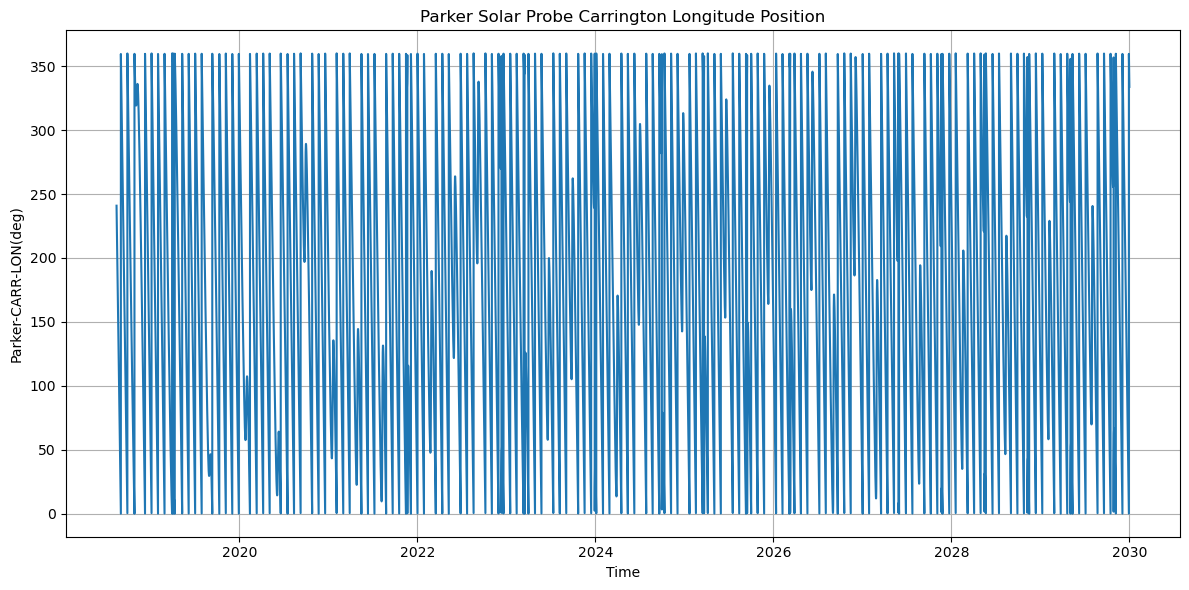


Demonstrating compatibility with Plotbot's time handling:
Demo time range: 2018-08-15 00:00:00 to 2018-08-25 00:00:00
Found 241 points in the demo time range
First timestamp in range: 2018-08-15 00:00:00
Last timestamp in range: 2018-08-25 00:00:00
Longitude values in range: 240.87° to 104.77°


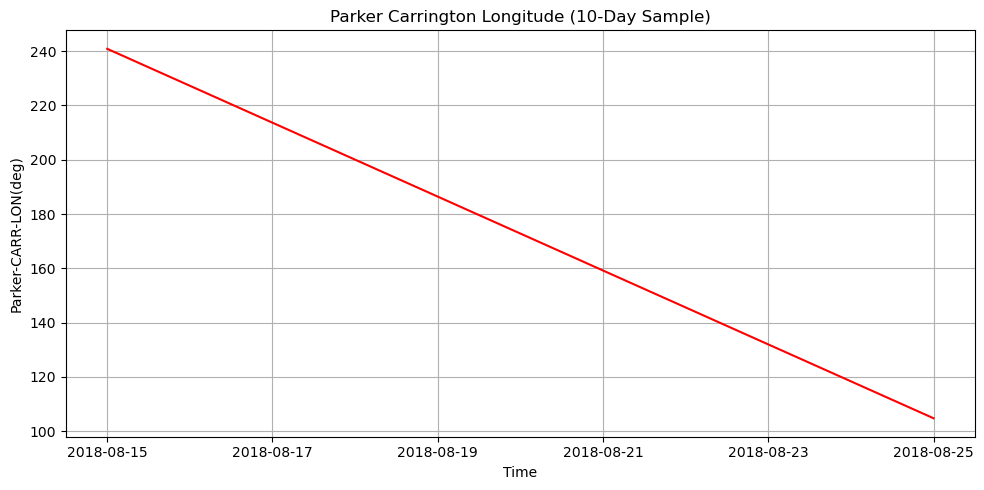


This data is now ready to be integrated with the Plotbot multiplot system.


In [ ]:
#Step 3

"""
Parker Solar Probe Carrington Longitude Data Processor
=====================================================

This script loads Parker Solar Probe Carrington Longitude data from an NPZ file and prepares it
for use with the Plotbot multiplot system. The data contains the relationship between time and the
Parker spacecraft's Carrington Longitude position (in degrees).

Purpose:
- Load compressed binary data from NPZ format (faster than CSV)
- Convert timestamps to the datetime format expected by Plotbot's multiplot system
- Demonstrate data access and basic visualization
- Prepare the data structure for integration with Plotbot's variable system

The Carrington Longitude provides the position of Parker Solar Probe in the Sun's rotating reference
frame, which is critical for understanding the spacecraft's relative position to solar features and
for correlating in-situ measurements with remote observations.

Original data source: Parker-SolO-Earth-15min-Trajectories-20180815-20300101.csv
Created: April 2025
"""

import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import pandas as pd

# Path to the NPZ file
npz_path = "../support_data/trajectories/Parker-CARR-LON.npz"

# Load the NPZ file
print("Loading Carrington Longitude data from NPZ file...")
data = np.load(npz_path)

# Extract the data
times = data['times']
values = data['values']

# Display information about the imported data
print(f"Loaded {len(times)} data points")
print(f"Time range: {times[0]} to {times[-1]}")
print(f"Carrington Longitude range: {np.min(values):.2f}° to {np.max(values):.2f}°")

# The key conversion: ensure times are in the format expected by multiplot
# The multiplot code expects datetime objects stored in a NumPy array
print("\nConverting timestamps to format expected by Plotbot's multiplot system...")

# Check what format we have currently
print(f"Original time array type: {type(times)}")
print(f"Original time element type: {type(times[0])}")

# Convert to Python datetime objects as expected by multiplot and time_clip functions
# This ensures compatibility with Plotbot's existing time processing methods
datetime_array = pd.to_datetime(times).to_pydatetime()  # Convert to Python datetime objects 
datetime_array = np.array(datetime_array)               # Ensure it's a numpy array

print(f"Converted time array type: {type(datetime_array)}")
print(f"Converted time element type: {type(datetime_array[0])}")

# Check the first few elements
print("\nFirst 5 timestamps (before and after conversion):")
for i in range(5):
    print(f"Original: {times[i]}, Converted: {datetime_array[i]}")

# Create a simple plot to visualize the data
plt.figure(figsize=(12, 6))
plt.plot(datetime_array, values)
plt.xlabel('Time')
plt.ylabel('Parker-CARR-LON(deg)')
plt.title('Parker Solar Probe Carrington Longitude Position')
plt.grid(True)
plt.tight_layout()
plt.show()

# Demonstrate how this would be used with Plotbot's time_clip functionality
print("\nDemonstrating compatibility with Plotbot's time handling:")
# Choose a small time slice for demonstration
from datetime import timedelta
demo_start = datetime_array[0]
demo_end = demo_start + timedelta(days=10)
print(f"Demo time range: {demo_start} to {demo_end}")

# Simulate the time_clip function from plotbot/plotbot_helpers.py
# In actual implementation, you would import and use the real function
def simplified_time_clip(datetime_array, start_time, end_time):
    """Simplified version of the time_clip function from plotbot"""
    if isinstance(start_time, str):
        start_dt = pd.to_datetime(start_time).to_pydatetime()
    else:
        start_dt = start_time
        
    if isinstance(end_time, str):
        end_dt = pd.to_datetime(end_time).to_pydatetime()
    else:
        end_dt = end_time
        
    indices = [i for i, t in enumerate(datetime_array) if start_dt <= t <= end_dt]
    return indices

# Get indices for the demo time range
demo_indices = simplified_time_clip(datetime_array, demo_start, demo_end)
print(f"Found {len(demo_indices)} points in the demo time range")

if len(demo_indices) > 0:
    print(f"First timestamp in range: {datetime_array[demo_indices[0]]}")
    print(f"Last timestamp in range: {datetime_array[demo_indices[-1]]}")
    print(f"Longitude values in range: {values[demo_indices[0]]:.2f}° to {values[demo_indices[-1]]:.2f}°")
    
    # Plot just this range
    plt.figure(figsize=(10, 5))
    plt.plot(datetime_array[demo_indices], values[demo_indices], 'r-')
    plt.xlabel('Time')
    plt.ylabel('Parker-CARR-LON(deg)')
    plt.title('Parker Carrington Longitude (10-Day Sample)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\nThis data is now ready to be integrated with the Plotbot multiplot system.")